In [ ]:
%ls

co.xlsx       no-no2.xlsx  viz_co.ipynb   whole_analysis.ipynb
No_No2.ipynb  SO2.xlsx     viz_so2.ipynb


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/NCI/DAP- CA1/DAP

/content/drive/MyDrive/Colab_Notebooks/NCI/DAP- CA1/DAP


In [ ]:
%ls

co.xlsx       no-no2.xlsx  viz_co.ipynb   whole_analysis.ipynb
No_No2.ipynb  SO2.xlsx     viz_so2.ipynb


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('SO2.xlsx')

In [ ]:
df.tail()

,Index,Date,Time,South Dublin - SO2 ug/m3,North Dublin - SO2 ug/m3,Dublin,Unnamed: 6,Unnamed: 7
8755,8756,2011-12-31,19,0.1,-0.6,-0.25,NaN,NaN
8756,8757,2011-12-31,20,0.2,-1.0,-0.40,NaN,NaN
8757,8758,2011-12-31,21,0.3,-0.6,-0.15,NaN,NaN
8758,8759,2011-12-31,22,0.1,-0.5,-0.20,NaN,NaN
8759,8760,2011-12-31,23,0.3,-0.6,-0.15,NaN,NaN


In [ ]:
del df["Unnamed: 6"]
del df["Unnamed: 7"]

In [ ]:
# give df['Date']
def month(month):
  l = month
  x= []
  
  for i in l:
    x .append(str(i)[5:7])
  
  x = [word.replace('01','JAN') for word in x]
  x = [word.replace('02','FEB') for word in x]
  x = [word.replace('03','MAR') for word in x]
  x = [word.replace('04','APR') for word in x]
  x = [word.replace('05','MAY') for word in x]
  x = [word.replace('06','JUNE') for word in x]
  x = [word.replace('07','JULY') for word in x]
  x = [word.replace('08','AUG') for word in x]
  x = [word.replace('09','SEPT') for word in x]
  x = [word.replace('10','OCT') for word in x]
  x = [word.replace('11','NOV') for word in x]
  x = [word.replace('12','DEC') for word in x]

  season = x
  
  season = [word.replace('JAN','Winter') for word in season]
  season = [word.replace('FEB','Winter') for word in season]
  season = [word.replace('MAR','Summer') for word in season]
  season = [word.replace('APR','Summer') for word in season]
  season = [word.replace('MAY','Summer') for word in season]
  season = [word.replace('JUNE','Rainy') for word in season]
  season = [word.replace('JULY','Rainy') for word in season]
  season = [word.replace('AUG','Rainy') for word in season]
  season = [word.replace('SEPT','Winter') for word in season]
  season = [word.replace('OCT','Winter') for word in season]
  season = [word.replace('NOV','Winter') for word in season]
  season = [word.replace('DEC','Winter') for word in season]

  return x,season

In [ ]:
month, season = month(df["Date"])

In [ ]:
df['Month'] = month
df['Season'] = season
df['South Dublin - SO2 ug/m3'] = df['South Dublin - SO2 ug/m3'].abs()
df['North Dublin - SO2 ug/m3'] = df['North Dublin - SO2 ug/m3'].abs()
df['Dublin'] = df['Dublin'].abs()


In [ ]:
del df['Index']

In [ ]:
df.head()

,Date,Time,South Dublin - SO2 ug/m3,North Dublin - SO2 ug/m3,Dublin,Month,Season
0,2011-01-01,0,0.3,0.45,0.375,JAN,Winter
1,2011-01-01,1,2.2,0.20,1.200,JAN,Winter
2,2011-01-01,2,2.0,0.45,1.225,JAN,Winter
3,2011-01-01,3,1.7,0.10,0.900,JAN,Winter
4,2011-01-01,4,1.7,0.45,1.075,JAN,Winter


In [ ]:
#yearly distribution in south - north and dublin city

In [ ]:
# excel to df and then provide the df,dubin column, pollutant name
def hourPlot(pollutant_name):
  plot = df.groupby(['Time']).mean().plot(kind='bar', y=['Dublin'], 
  figsize=(15,10),color = 'cornflowerblue')
  plt.title("Hour wise Distribution of "+ pollutant_name +"(ug/m3) in Dublin for year 2011")
  plt.xlabel("Hour (24 hour scale)")
  plt.ylabel("Percentage of "+pollutant_name+" (ug/m3)")
  for p in plot.patches:
    plot.annotate(str(p.get_height())[:5], (p.get_x() * 1.005, p.get_height() * 1.005))

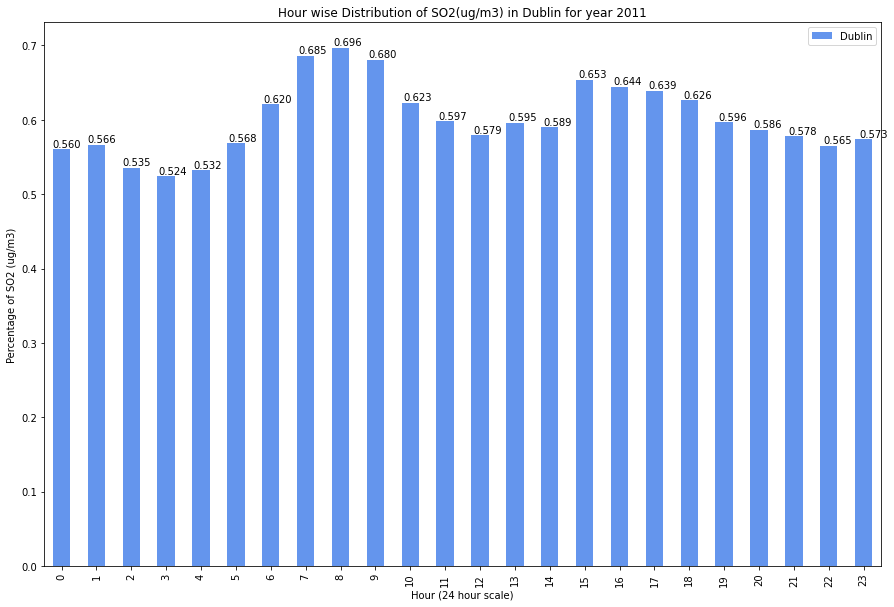

In [ ]:
hourPlot("SO2")

In [ ]:
# month wise comparision of the polutant:

In [ ]:
df.head()

,Date,Time,South Dublin - SO2 ug/m3,North Dublin - SO2 ug/m3,Dublin,Month,Season
0,2011-01-01,0,0.3,0.45,0.375,JAN,Winter
1,2011-01-01,1,2.2,0.20,1.200,JAN,Winter
2,2011-01-01,2,2.0,0.45,1.225,JAN,Winter
3,2011-01-01,3,1.7,0.10,0.900,JAN,Winter
4,2011-01-01,4,1.7,0.45,1.075,JAN,Winter


In [ ]:
def monthly_southNorthDublin(pollutant_name):
  df['South Dublin - SO2 ug/m3'] = df["South Dublin - SO2 ug/m3"]/3
  df.groupby(['Month']).mean().plot( y=["South Dublin - SO2 ug/m3", "North Dublin - SO2 ug/m3"], kind="bar"
  ,figsize=(15,10),color= ['cornflowerblue','orange'])
  plt.title("Month wise Distribution of "+ pollutant_name +"(ug/m3) in Dublin for year 2011")
  plt.ylabel("Percentage of "+pollutant_name+" (ug/m3)")
  plt.xlabel("Month")


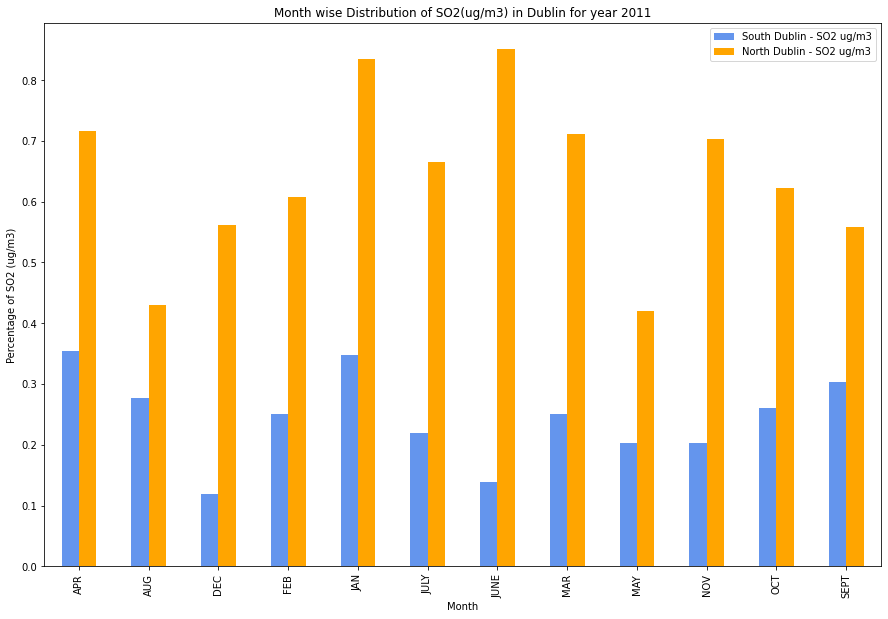

In [ ]:
monthly_southNorthDublin("SO2")

In [ ]:
# wekly Analysis:
df_week = df
df_week = df_week[:8736]

In [ ]:
def convertWeeks():
  weeks = []
  num= 1
  for i in range(1,8737):
    weeks.append(num)
    if i%168 == 0:
      num = num+1
  return weeks

In [ ]:
df_week['Week'] = convertWeeks()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_week.tail()

,Date,Time,South Dublin - SO2 ug/m3,North Dublin - SO2 ug/m3,Dublin,Month,Season,Week
8731,2011-12-30,19,0.100000,0.4,0.05,DEC,Winter,52
8732,2011-12-30,20,0.033333,0.5,0.20,DEC,Winter,52
8733,2011-12-30,21,0.100000,0.4,0.05,DEC,Winter,52
8734,2011-12-30,22,0.033333,0.5,0.20,DEC,Winter,52
8735,2011-12-30,23,0.100000,0.6,0.15,DEC,Winter,52


In [ ]:
def weekly_southNorthDublin(pollutant_name):
  
  df_week.groupby(['Week']).mean().plot( y=["South Dublin - SO2 ug/m3", "North Dublin - SO2 ug/m3"], kind="line"
  ,figsize=(15,8),color= ['cornflowerblue','orange'],marker ='o')
  plt.title("Week wise Distribution of "+ pollutant_name +"(ug/m3) in Dublin for year 2011")
  plt.ylabel("Percentage of "+pollutant_name+" (ug/m3)")
  plt.xlabel("52 Weeks 2011")
  plt.xticks(range(1, 53))

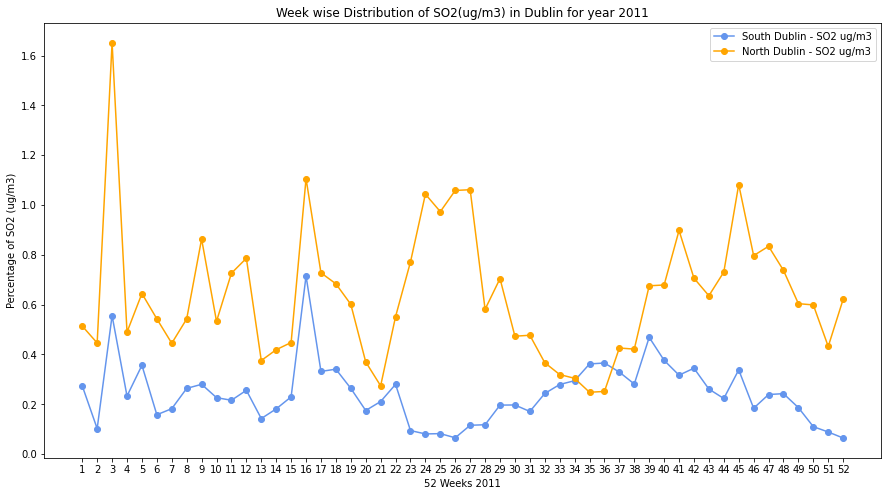

In [ ]:
weekly_southNorthDublin("SO2")

In [ ]:
#seasonal polution index

In [ ]:
def seasonal_southNorthDublin(pollutant_name):
  df.groupby(['Season']).sum().plot( y="Dublin", kind="pie"
  , shadow = True,subplots=True, startangle=90,figsize=(15,10), autopct='%1.1f%%',colors= ['cornflowerblue','orange','green'])
  plt.title("Season wise Distribution of "+ pollutant_name +"(ug/m3) in Dublin for year 2011")
  #plt.xlabel('Seasons - 2011 : Percentage of '+pollutant_name+" (ug/m3)")
  
  

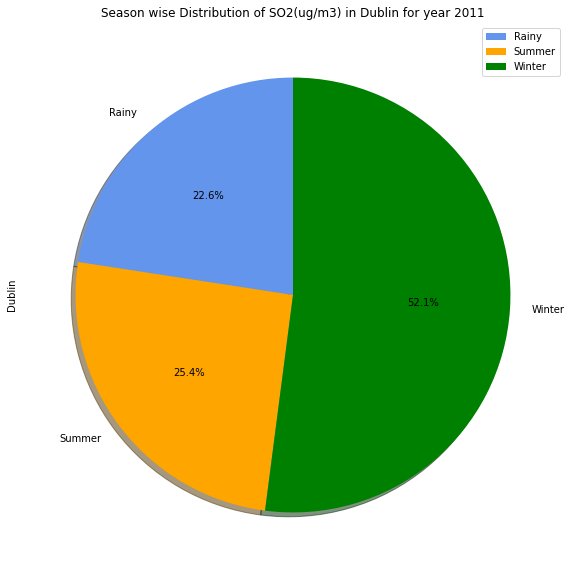

In [ ]:
seasonal_southNorthDublin('SO2')